## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

In [2]:
#### set the random seed
np.random.seed(137)

In [3]:
color = sns.color_palette()
sns.set_style('darkgrid')

# 1. Import data

In [4]:
# original_data = pd.read_csv('houspr.csv', index_col=0).drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
original_data = pd.read_csv('houspr.csv', index_col=0)
train_data = original_data.iloc[:1200]
test_data = original_data.iloc[1200:]

In [5]:
original_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### statistics of the data

In [6]:
original_data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
original_data.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


### 1.1 Fit normal distribution with original data(sale_price) and compare

In [8]:
# sns.distplot(train_data['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(train_data['SalePrice'])
print("The mean of normal fitting the orginal data is {} \nThe standard deviation of normal fitting the orginal data is {}".format(round(mu, 4),round(sigma, 4)))


The mean of normal fitting the orginal data is 181414.6283 
The standard deviation of normal fitting the orginal data is 81037.122


### 1.2 Plot the distribution of sale_price(original data)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


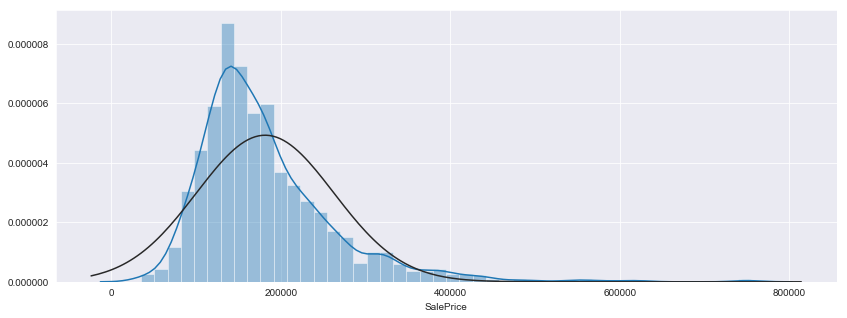

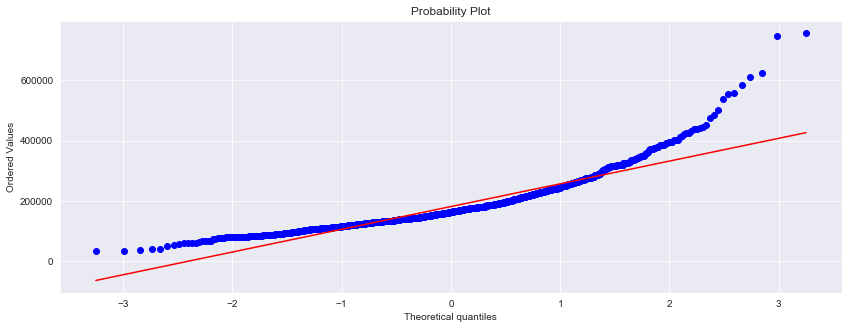

In [54]:
plt.figure(figsize=(14, 5))
sns.distplot(train_data['SalePrice'], fit=norm)
plt.savefig("normal distribution.jpg")

# Get the QQ-plot
plt.figure(figsize=(14, 5))
res = stats.probplot(train_data['SalePrice'], plot=plt)

plt.show()

# 2. Data processing

## 2.1 Do the  log transfromation on sale_price

In [56]:
train_data.loc[:, "SalePrice"] = np.log1p(train_data["SalePrice"])

### 2.1.1 Fit normal distribution with the data after log-transformation and compare

In [57]:
(mu1, sigma1) = norm.fit(train_data['SalePrice'])
print("The mean of normal fitting the log-data is {} \nThe standard deviation of normal fitting the log-data is {}".format(round(mu1, 4),round(sigma1, 4)))


The mean of normal fitting the log-data is 12.0243 
The standard deviation of normal fitting the log-data is 0.4034


### 2.1.2 Plot the distribution of log sale_price

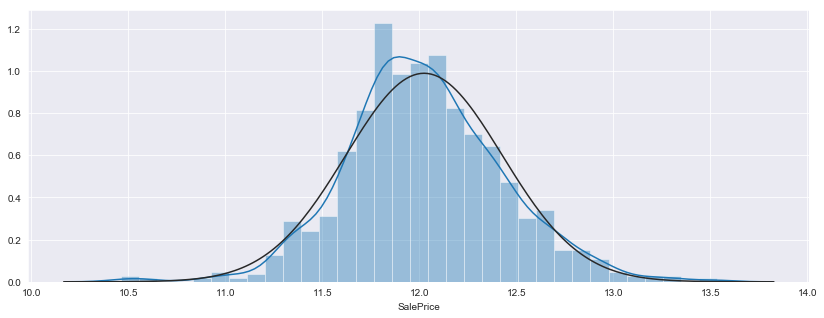

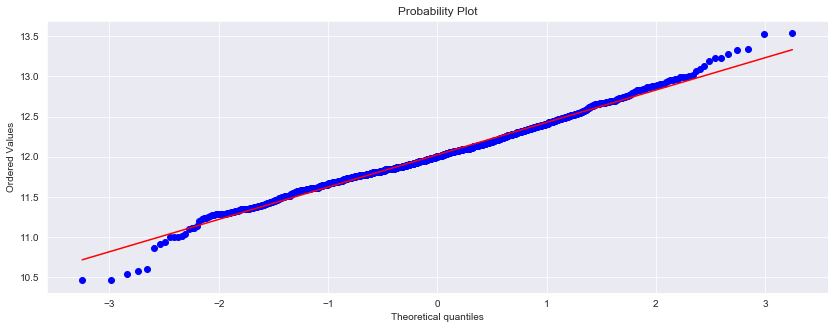

In [58]:
plt.figure(figsize=(14, 5))
sns.distplot(train_data['SalePrice'], fit=norm)
plt.savefig("log-normal distribution.jpg")

# Get also the QQ-plot
plt.figure(figsize=(14, 5))
res = stats.probplot(train_data['SalePrice'], plot=plt)

plt.show()

## 2.2 Plot the correlation matrix

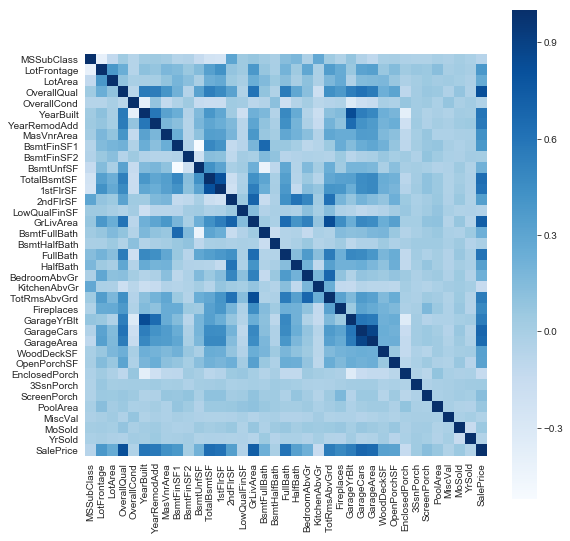

In [19]:
plt.subplots(figsize=(9, 9))
corr_x = train_data.corr()
sns.heatmap(corr_x, annot=False, vmax=1, square=True, cmap="Blues")

## 2.3 Dealing with the missing values


Text(0.5, 1.0, 'Percent missing data by feature')

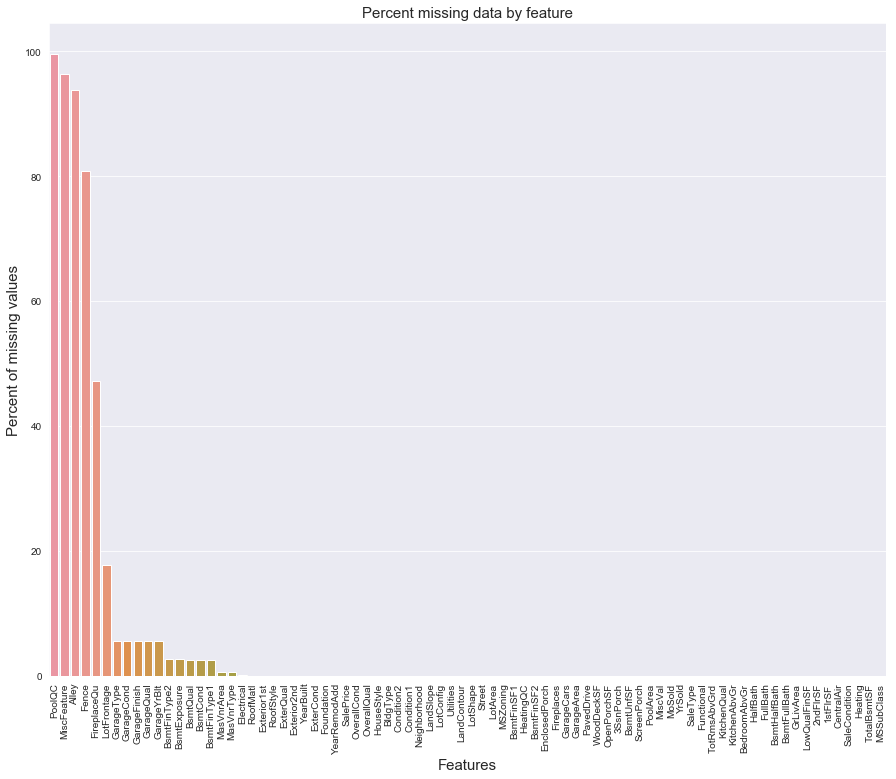

In [20]:
missing_pd = (original_data.isnull().sum() / original_data.shape[0] * 100).sort_values(ascending=False)
missing_pd.head(20)

f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=missing_pd.index, y=missing_pd)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## 2.4 we drop the variables which missing data ratio exceeding 10%

In [21]:
original_data = original_data.drop(missing_pd[missing_pd > 10].index, axis=1)
missing_pd = (original_data.isnull().sum() / original_data.shape[0] * 100).sort_values(ascending=False)
missing_variables = missing_pd[missing_pd > 0].index

In [22]:
# we still have 13 variables to deal with
# Replace GarageType, GarageFinish, GarageQual and GarageCond missing value with None
for var in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    original_data[var] = original_data[var].fillna('None')

In [23]:
# Replace GarageYrBlt missing value with 0
original_data['GarageYrBlt'] = original_data['GarageYrBlt'].fillna(0)

In [24]:
# Replace BsmtFinType2, BsmtExposure, BsmtQual, BsmtFinType1, BsmtCond missing value with None
for var in ('BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond'):
    original_data[var] = original_data[var].fillna('None')

In [25]:
# Replace MasVnrArea missing with 0
original_data["MasVnrArea"] = original_data["MasVnrArea"].fillna(0)

In [26]:
# Replace MasVnrType missing with None
original_data["MasVnrType"] = original_data["MasVnrType"].fillna("None")

In [27]:
# Replace Electrical missing with most frequent value
original_data['Electrical'] = original_data['Electrical'].fillna(original_data['Electrical'].mode()[0])

###  check the missing value

In [28]:
missing_pd = (original_data.isnull().sum() / original_data.shape[0] * 100).sort_values(ascending=False)
missing_variables = missing_pd[missing_pd > 0].index
print(missing_variables.shape)

(0,)


## 2.5 Now we have 73 variables


### 2.5.1 Transform non-numerical labels to numerical labels

In [29]:
original_data['MSSubClass'] = original_data['MSSubClass'].astype('str')
original_data['OverallCond'] = original_data['MSSubClass'].astype('str')
original_data['YrSold'] = original_data['YrSold'].astype(str)
original_data['MoSold'] = original_data['MoSold'].astype(str)

### Laberl Encoding
s_variables = original_data.columns[(original_data.dtypes == 'object')]
for col in s_variables:
    lbl = LabelEncoder()
    lbl.fit(list(original_data[col].values))
    original_data[col] = lbl.transform(list(original_data[col].values))

## 2.6 features engineering

In [30]:
original_data['MeanArea'] = original_data['MSSubClass'].map(
    original_data.groupby('MSSubClass')['GrLivArea', 'TotalBsmtSF'].mean().sum(1))
original_data['MeanGrLivArea'] = original_data['MSSubClass'].map(
    original_data.groupby('MSSubClass')['GrLivArea'].mean())
original_data['MeanTotalBsmtSF'] = original_data['MSSubClass'].map(
    original_data.groupby('MSSubClass')['TotalBsmtSF'].mean())

In [31]:
# generate the log sale_price
original_data['LogSalePrice'] = np.log2(original_data['SalePrice'])

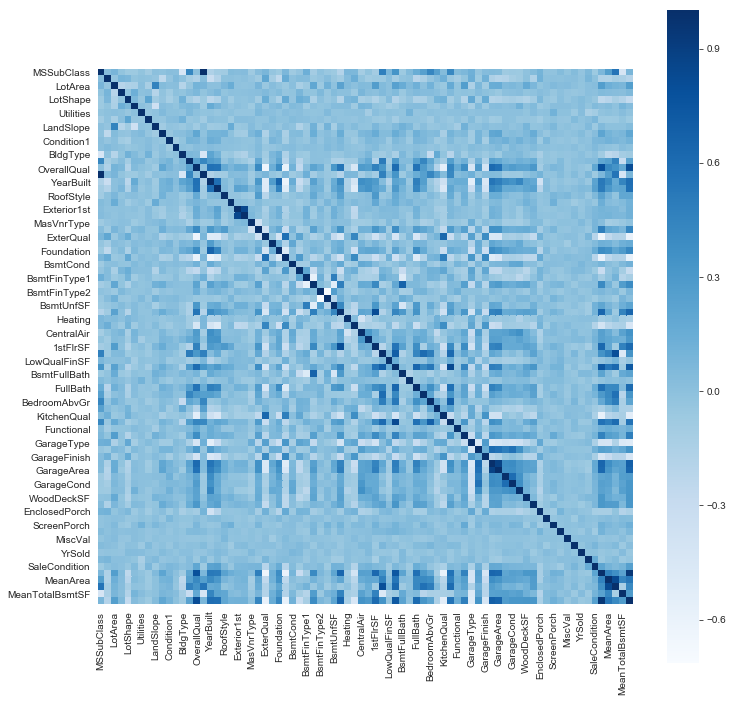

In [32]:
# inspect the transformed data
train_data = original_data.iloc[:1200]

# correlation matrix
plt.subplots(figsize=(12, 12))
corr_x = train_data.corr()
sns.heatmap(corr_x, annot=False, vmax=1, square=True, cmap="Blues")

corr_x = train_data.corr()
# select the varibles that have correlation greater than 0.3
varibles = train_data.columns[abs(corr_x.LogSalePrice) > 0.4]

# extract the 21 variables data
train_data = train_data[varibles]
test_data = original_data.iloc[1200:][varibles]

## 2.7 Explore the outliers

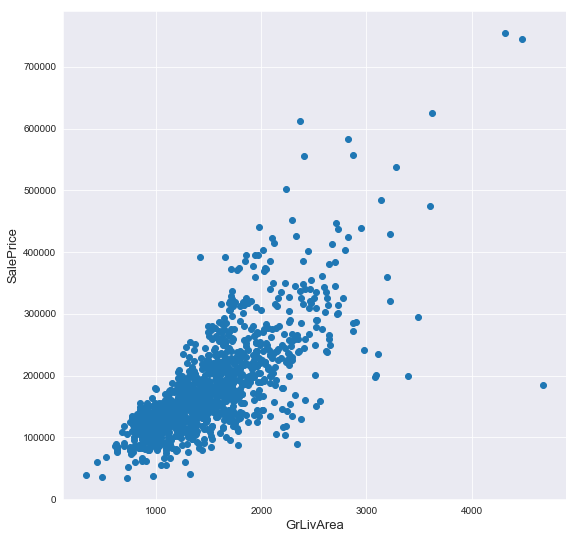

In [33]:
fig, ax = plt.subplots(figsize=(9, 9))

ax.scatter(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### 2.7.1 Deleting outliers


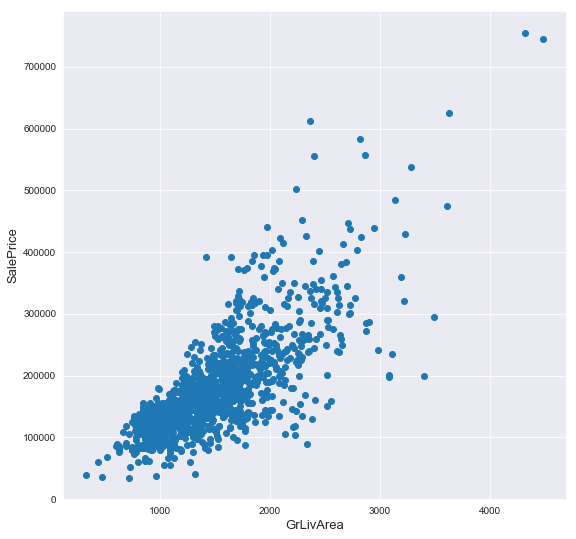

In [36]:
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index)
# Check the graphic again
fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(train_data['GrLivArea'], train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### 2.7.2 Explore another outliers

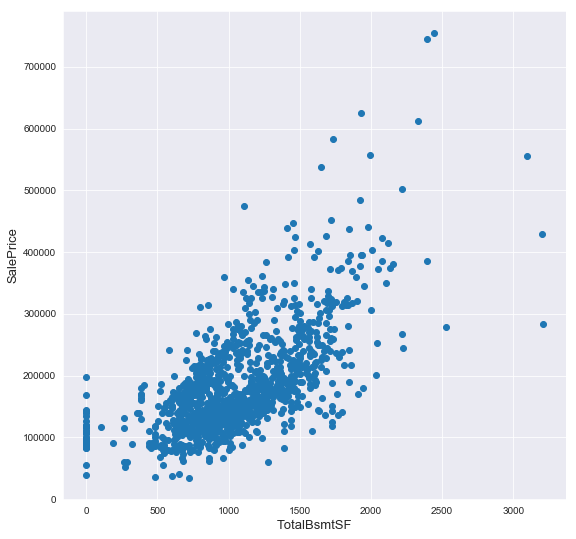

In [37]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(x=train_data['TotalBsmtSF'], y=train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

### 2.7.3 Deleting outliers


In [38]:
train_data = train_data.drop(train_data[(train_data['TotalBsmtSF'] > 3000) & (train_data['SalePrice'] < 300000)].index)

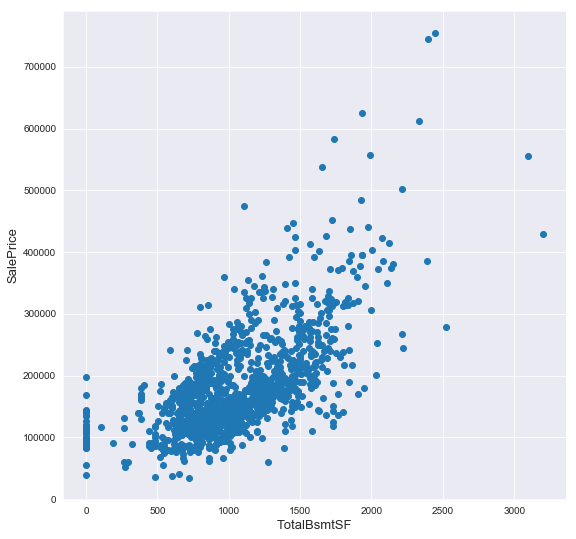

In [39]:
# Check the graphic again
fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(train_data['TotalBsmtSF'], train_data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

## 2.8 Get traing data and test data


In [40]:
train_y = train_data['LogSalePrice']
train_x = train_data.drop(['LogSalePrice', 'SalePrice'], axis=1)

test_y = test_data['LogSalePrice']
test_x = test_data.drop(['LogSalePrice', 'SalePrice'], axis=1)

# 3. Features selection


In [81]:
X_new = SelectKBest(f_regression, k=15).fit_transform(train_x, train_y)
features = []
j = 0
for i in range(train_x.shape[1]):
    if all(X_new[:, j] == train_x.iloc[:, i]):
        features.append(train_x.columns[i])
        j += 1
        if j == 15:
            break
##### now we have 15 features

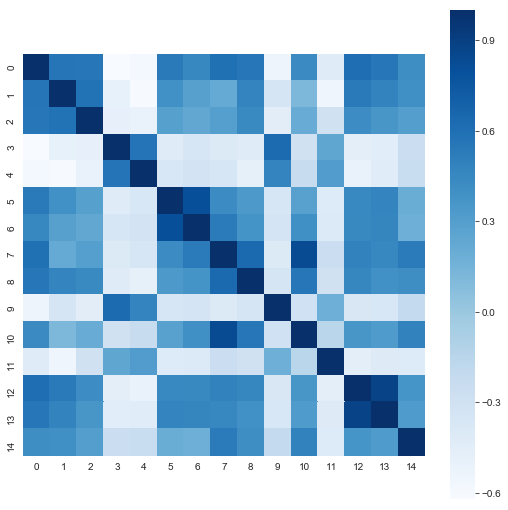

In [84]:
df = pd.DataFrame(X_new)
plt.subplots(figsize=(9, 9))
correlations = df.corr()
sns.heatmap(correlations, annot=False, vmax=1, square=True, cmap="Blues")
plt.savefig("correlation.jpg")
plt.show()

# 4. Fit the models

In [42]:
train_x = train_x[features]
test_x = test_x[features]

outcome = {
    'RF': pd.DataFrame(),
    'OLS': pd.DataFrame(),
    'RIDGE': pd.DataFrame(),
    'LASSO': pd.DataFrame()
}

In [43]:
def models(train_x, train_y):
    
    ########################
    ##### RandomForest #####
    ########################
    # Random Forest Regressor parameters
    rf_params = {
        'n_jobs': -1,
        'n_estimators': 300,
        'warm_start': True,
        'max_depth': 15,
        'min_samples_leaf': 9,
        'max_features': 'log2',
        'verbose': 0
    }
    model = GridSearchCV(RandomForestRegressor(**rf_params),
                         {'max_depth': [10, 12, 14],
                          'min_samples_leaf': [1, 2]},
                         n_jobs=-1, cv=5)
    model_1 = model.fit(train_x, train_y)

    model = RandomForestRegressor(**rf_params)
    model = model.set_params(**model_1.best_params_)
    model_1 = model.fit(train_x, train_y)

    m1 = mean_squared_error(test_y, model_1.predict(test_x))

    df_1 = pd.Series(model_1.feature_importances_, index=train_x.columns)
    df_1['mean_squared_error'] = m1

    ###############
    ##### OLS #####
    ###############
    ols_params = {
        'copy_X': True,
        'fit_intercept': True,
        'n_jobs': None,
        'normalize': False
    }
    model = LinearRegression(**ols_params)
    model_2 = model.fit(train_x, train_y)

    m2 = mean_squared_error(test_y, model_2.predict(test_x))

    df_2 = pd.Series(model_2.coef_, index=train_x.columns)
    df_2['mean_squared_error'] = m2

    #################
    ##### Ridge #####
    #################
    rid_params = {
        'alpha': 0.3,
        'copy_X': True,
        'fit_intercept': True,
        'normalize': False
    }
    model = GridSearchCV(Ridge(**rid_params),
                         {'alpha': [40, 50, 60]},
                         n_jobs=-1, cv=5)
    model_3 = model.fit(train_x, train_y)

    model = Ridge(**rid_params)
    model = model.set_params(**model_3.best_params_)
    model_3 = model.fit(train_x, train_y)

    m3 = mean_squared_error(test_y, model_3.predict(test_x))

    df_3 = pd.Series(model_3.coef_, index=train_x.columns)
    df_3['mean_squared_error'] = m3

    #################
    ##### Lasso #####
    #################
    las_params = {
        'alpha': 0.1,
        'copy_X': True,
        'fit_intercept': True,
        'normalize': False
    }
    model = GridSearchCV(Lasso(**las_params),
                         {'alpha': [0.004, 0.005, 0.006]},
                         n_jobs=-1, cv=5)
    model_4 = model.fit(train_x, train_y)

    model = Lasso(**las_params)
    model = model.set_params(**model_4.best_params_)
    model_4 = model.fit(train_x, train_y)

    m4 = mean_squared_error(test_y, model_4.predict(test_x))

    df_4 = pd.Series(model_4.coef_, index=train_x.columns)
    df_4['mean_squared_error'] = m4
    
    fitted_models = [model_1, model_2, model_3, model_4]

    return [df_1, df_2, df_3, df_4], fitted_models

In [45]:
dfs, fitted_models= models(train_x, train_y)
outcome['RF'] = outcome['RF'].append(dfs[0].to_frame().T)
outcome['OLS'] = outcome['OLS'].append(dfs[1].to_frame().T)
outcome['RIDGE'] = outcome['RIDGE'].append(dfs[2].to_frame().T)
outcome['LASSO'] = outcome['LASSO'].append(dfs[3].to_frame().T)

# 5. Use bootstrap to get the variance of the estimators of the parameters

In [47]:
# bootstrap in model
N = 100   # for getting the varaince, 100-200 times paths are enough, as for percentile we will need more times of replication
for i in range(N):
    x, y = resample(train_x, train_y)
    dfs, _ = models(x, y)
    outcome['RF'] = outcome['RF'].append(dfs[0].to_frame().T)
    outcome['OLS'] = outcome['OLS'].append(dfs[1].to_frame().T)
    outcome['RIDGE'] = outcome['RIDGE'].append(dfs[2].to_frame().T)
    outcome['LASSO'] = outcome['LASSO'].append(dfs[3].to_frame().T)

In [48]:
results = {}
models_name = ['RF', 'OLS', 'RIDGE', 'LASSO']
for m in models_name:
    results[m] = pd.concat((outcome[m].iloc[0], outcome[m].iloc[1:].std()), 1)
    results[m].columns = [['features', 'std']]
    results[m] *= 1000
    results[m] = results[m].round(2)
result = pd.concat(results, 1)
result[['RF', 'OLS', 'RIDGE', 'LASSO']].to_csv('result.csv')

In [86]:
result

LASSO             OLS              RF           RIDGE  \
                   features    std features    std features    std features   
OverallQual          108.84   9.12   113.90   9.37   168.99  11.95   107.08   
YearBuilt              1.92   0.39     1.93   0.40   102.01  13.45     1.94   
YearRemodAdd           3.45   0.45     3.36   0.46    47.97   8.98     3.43   
ExterQual              0.00   4.59    16.37  14.85    52.21  13.07    10.74   
BsmtQual             -10.16   7.19   -15.41   7.56    34.52   7.74   -15.30   
TotalBsmtSF            0.24   0.03     0.24   0.03    77.01  10.82     0.24   
1stFlrSF               0.06   0.04     0.06   0.04    61.35   6.83     0.06   
GrLivArea              0.37   0.02     0.39   0.03   171.67  12.89     0.39   
FullBath              -0.00  13.26   -34.32  18.83    44.48  12.19   -25.81   
KitchenQual          -12.87   9.37   -25.71   9.39    25.47   8.80   -23.68   
TotRmsAbvGrd          -3.07   6.09    -6.92   7.82    25.49   2.73    -7.31   
GarageType           -10.46   4.18   -11.50   4.20    34.53  10.78   -11.87   
GarageCars             0.00   7.95    26.57  21.51    60.95  11.17    20.01   
GarageArea             0.32   0.04     0.23   0.06    65.66  10.38     0.26   
MeanArea               0.12   0.03     0.12   0.03    27.69   3.90     0.12   
mean_squared_error   107.45   3.92   104.55   4.15    51.54   1.79   105.90   

                           
                      std  
OverallQual          8.84  
YearBuilt            0.39  
YearRemodAdd         0.45  
ExterQual           12.77  
BsmtQual             7.18  
TotalBsmtSF          0.03  
1stFlrSF             0.04  
GrLivArea            0.03  
FullBath            14.95  
KitchenQual          8.48  
TotRmsAbvGrd         7.46  
GarageType           4.15  
GarageCars          15.73  
GarageArea           0.05  
MeanArea             0.03  
mean_squared_error   4.02

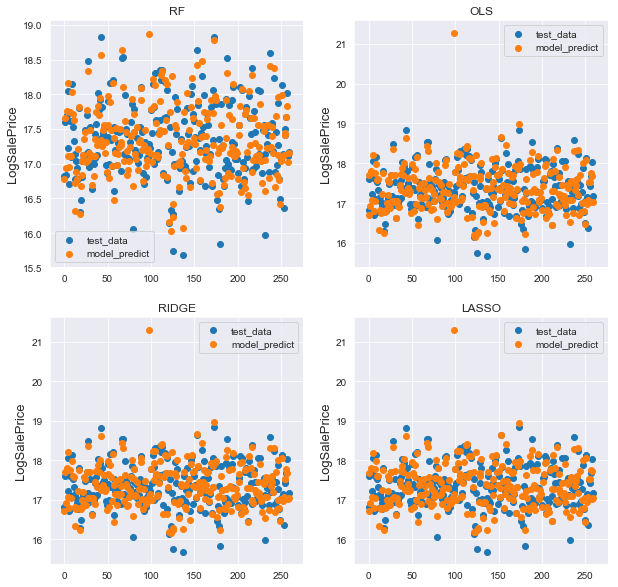

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, val in enumerate(models_name):
    axes[i//2, i%2].scatter(range(260), test_y, label="test_data")
    axes[i//2, i%2].scatter(range(260), fitted_models[i].predict(test_x), label="model_predict")
    axes[i//2, i%2].set_ylabel('LogSalePrice', fontsize=13)
    axes[i//2, i%2].set_title(val)
    axes[i//2, i%2].legend()
plt.savefig("Comparison_of_test_data_with_predicted_data.jpg")
plt.show()